In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv("dataset.csv")

In [35]:
df.shape

(32581, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  object 
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  object 
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


In [37]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [38]:
# Age de outlier var, incomeda da olabilir. kredi ortalaması 9589$
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.0,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.0,38500.00,55000.00,79200.00,6000000.00
loan_amnt,32581.0,9589.371106,6322.086646,500.0,5000.00,8000.00,12200.00,35000.00
loan_status,32581.0,0.218164,0.413006,0.0,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.0,3.00,4.00,8.00,30.00


In [39]:
# Loan Status değişkeni 0 ve 1 değerleri alıyor. 0 = Geri Ödenmiş, 1 = Geri Ödenmemiş
df['loan_status'] = df['loan_status'].astype(bool)

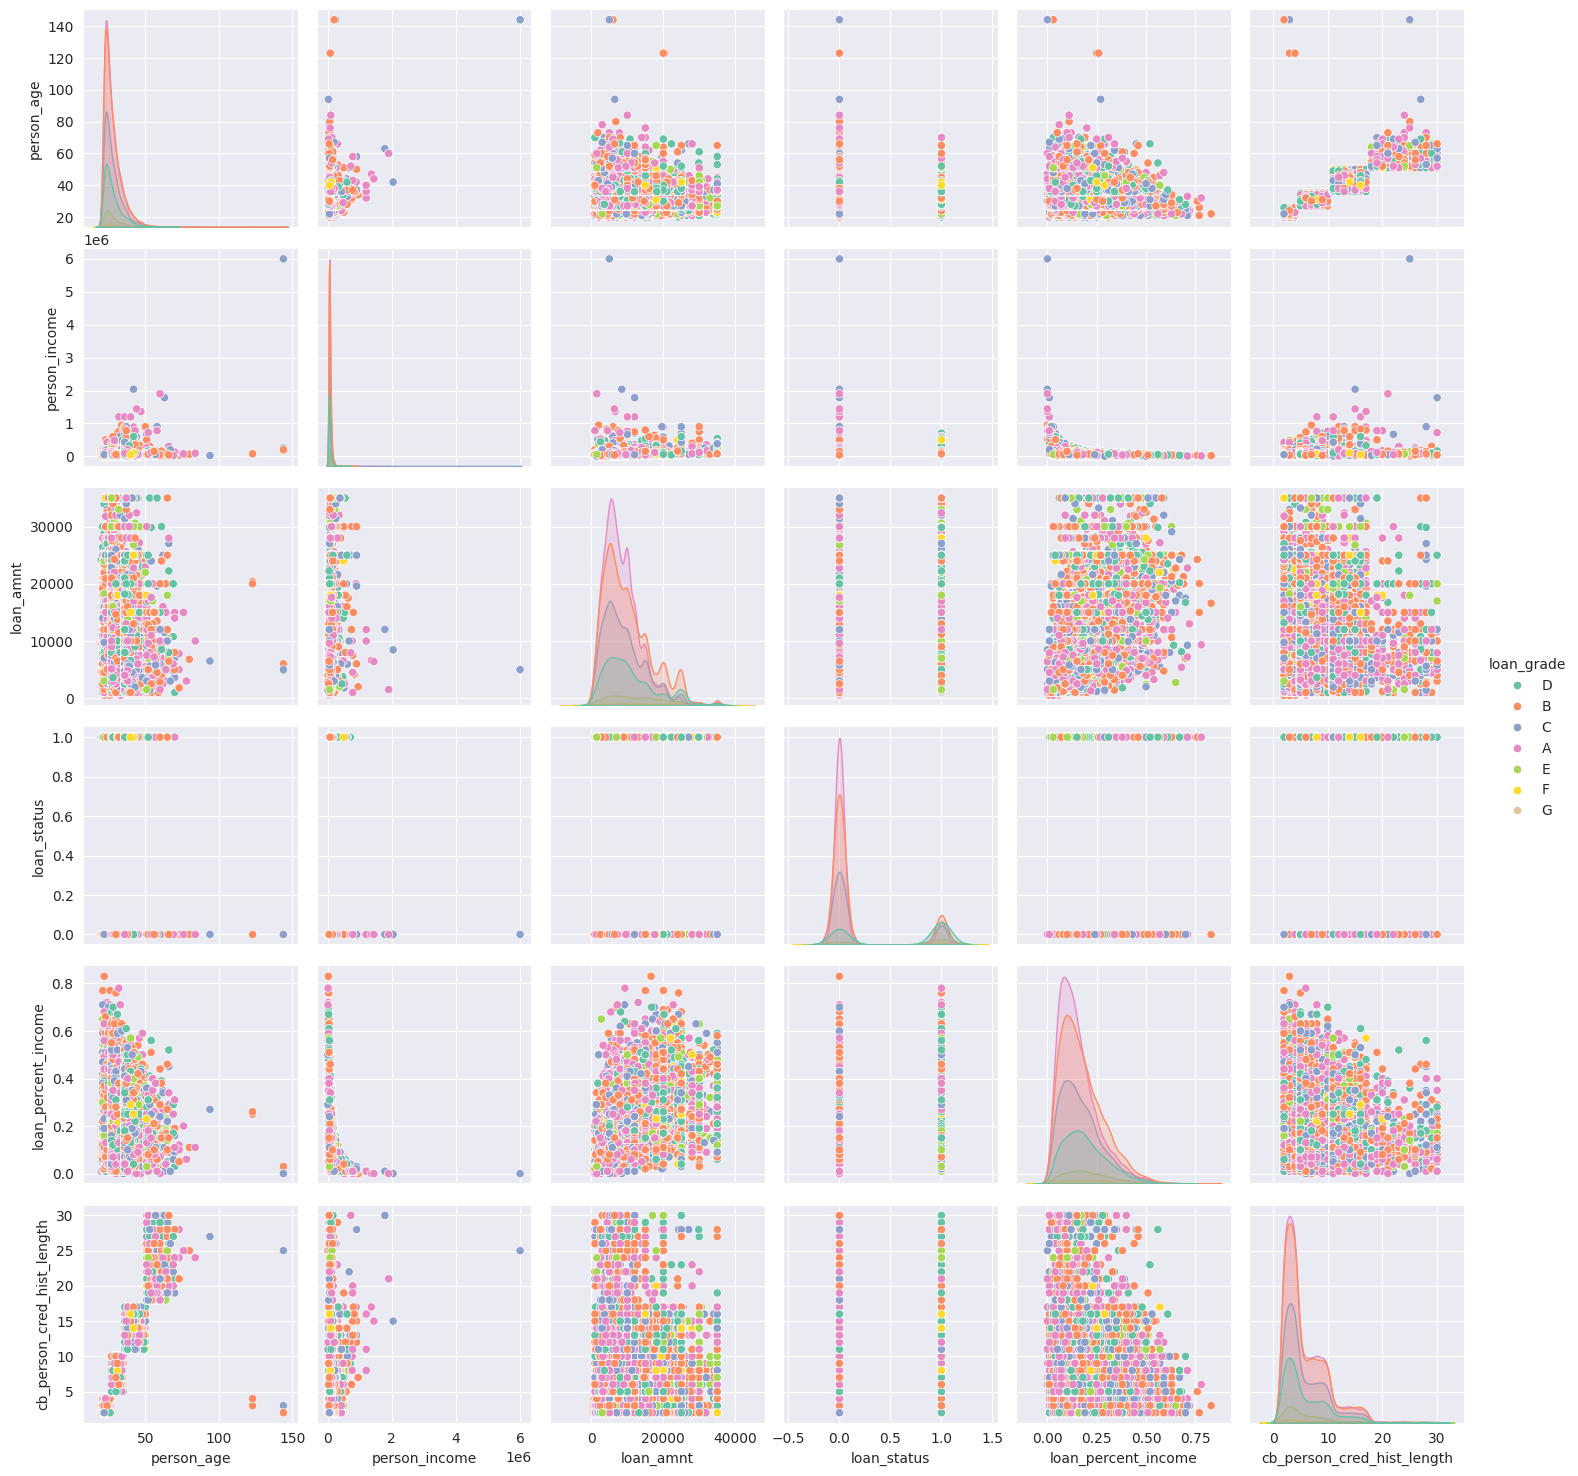

In [40]:
sns.pairplot(df, diag_kind='kde', hue='loan_grade', palette='Set2')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82442137a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82440c5d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8244211490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82440c7aa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82440c45c0>],
 'means': []}

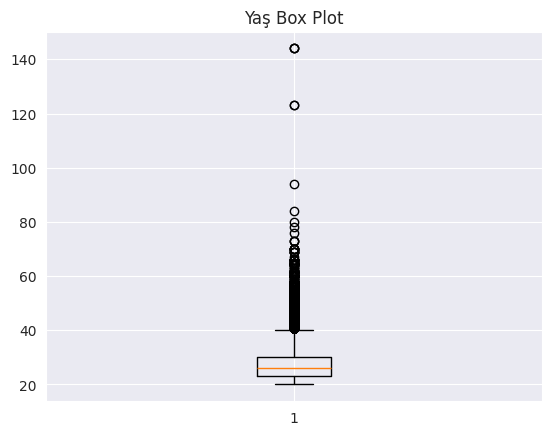

In [41]:
plt.title("Yaş Box Plot")
plt.boxplot(df['person_age'])

In [42]:
# Yaş verisinde 144 gibi outlierlar var 100 yaş üstü olanları 100 olarak değiştirdim
df['person_age'] = df['person_age'].apply(lambda x: 100 if x > 100 else x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f823ff0ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f823ff0f500>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f823ff0edb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f823ff0fb30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f823ff0fda0>],
 'means': []}

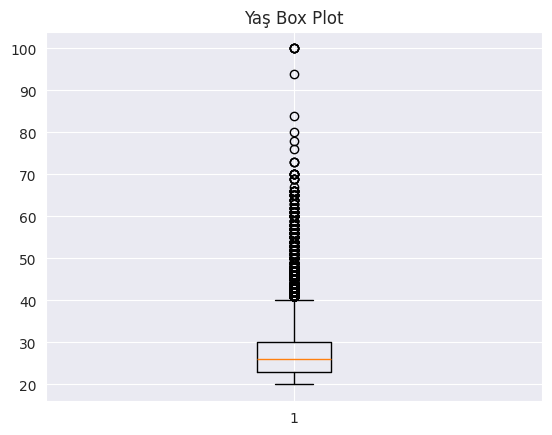

In [43]:
plt.title("Yaş Box Plot")
plt.boxplot(df['person_age'])

In [44]:
#Kategorik Değişkenlerin Dağılımları
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:\n", df[col].value_counts())


person_home_ownership:
 person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

person_emp_length:
 person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
?         895
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

loan_intent:
 loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade:
 loan_grade
A    10777
B    10451
C     6458
D    

In [45]:
# Çalışma hayatı uzunluğu verisinin temizlenmesi ve doğru veri tipine çevirilmesi
df.person_emp_length = df.person_emp_length.replace("?",np.nan)
df.person_emp_length = df.person_emp_length.astype(float)
df.person_emp_length = df.person_emp_length.fillna(df.person_emp_length.mean())
df.person_emp_length.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32581 entries, 0 to 32580
Series name: person_emp_length
Non-Null Count  Dtype  
--------------  -----  
32581 non-null  float64
dtypes: float64(1)
memory usage: 254.7 KB


In [46]:
# Kontrol
df.person_emp_length.isnull().sum()

np.int64(0)

In [47]:
# Faiz oranına tekrardan bakış
print(df['loan_int_rate'].value_counts())

loan_int_rate
?        3116
7.51      756
10.99     749
7.49      645
7.88      642
         ... 
23.22       1
16.71       1
18.54       1
20.69       1
20.53       1
Name: count, Length: 349, dtype: int64


In [48]:
# loan_int_rate değişkeni sayısal değil, string olarak gözüküyor. Bu yüzden sayısal bir değişken haline getirmemiz lazım.
df["loan_int_rate"] = pd.to_numeric(df["loan_int_rate"].replace("?", np.nan))

In [49]:
# Devamında anlamı birbirine yakın olduğunu düşündüğüm iki değişkeni gerçekten anlamlı mı diye kontrol ediyorum
df.groupby("loan_grade")["loan_int_rate"].mean().sort_index()

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [50]:
# loan_int_rate değişkeninin eksik değerlerini, loan_grade değişkeninin medyanlarına göre gruplandırarak dolduruyorum.
df["loan_int_rate"] = df.groupby("loan_grade")["loan_int_rate"].transform(lambda x: x.fillna(x.median()))

In [51]:
# "?" değerler yok ve loan_grade in karşılığının medyanına göre dolduruldu.
print(df['loan_int_rate'].value_counts())

loan_int_rate
10.99    1805
7.49     1648
13.48     785
7.51      756
7.88      642
         ... 
23.22       1
16.71       1
18.54       1
20.69       1
20.53       1
Name: count, Length: 349, dtype: int64


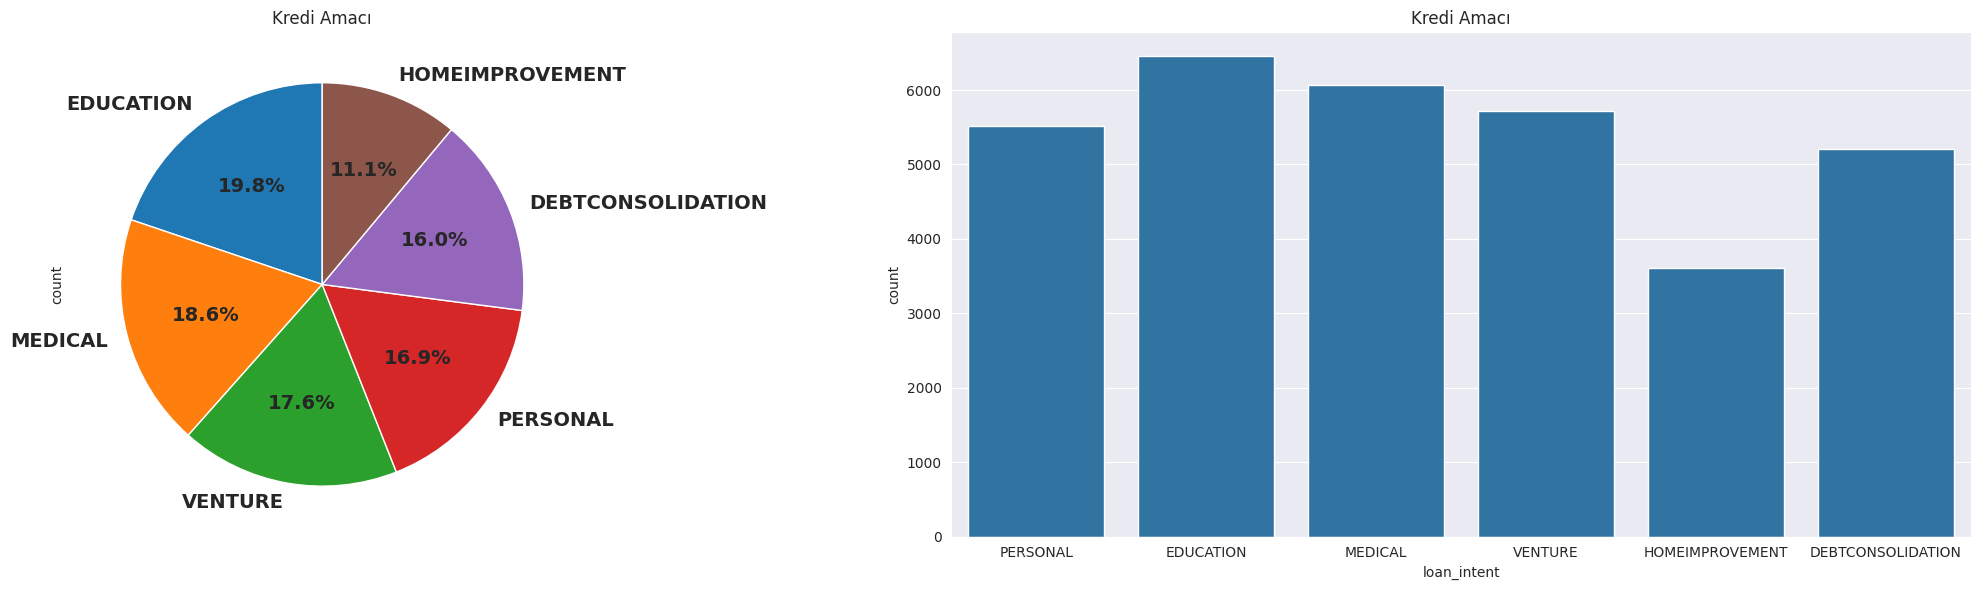

In [52]:
# Kredi Amacı Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6))
# Pie Chart
df['loan_intent'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kredi Amacı')

# Countplot
sns.countplot(x='loan_intent', data=df, ax=axes[1])
axes[1].set_title('Kredi Amacı')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

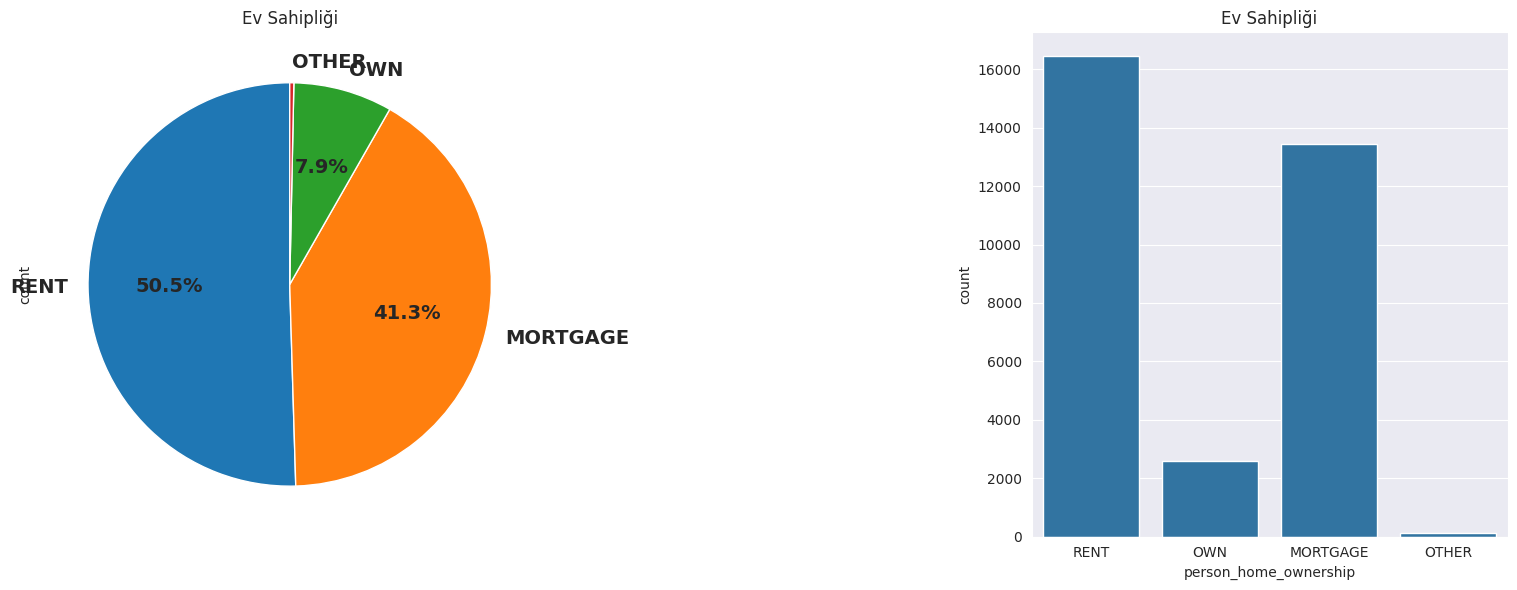

In [53]:
#Ev Sahipliği Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6),width_ratios=[4,1])
# Pie Chart
df['person_home_ownership'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Ev Sahipliği')

# Countplot
sns.countplot(x='person_home_ownership', data=df, ax=axes[1])
axes[1].set_title('Ev Sahipliği')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

In [54]:
# Ev sahipliği verisinden OTHER değerini kaldırma
df = df[df['person_home_ownership'] != 'OTHER']

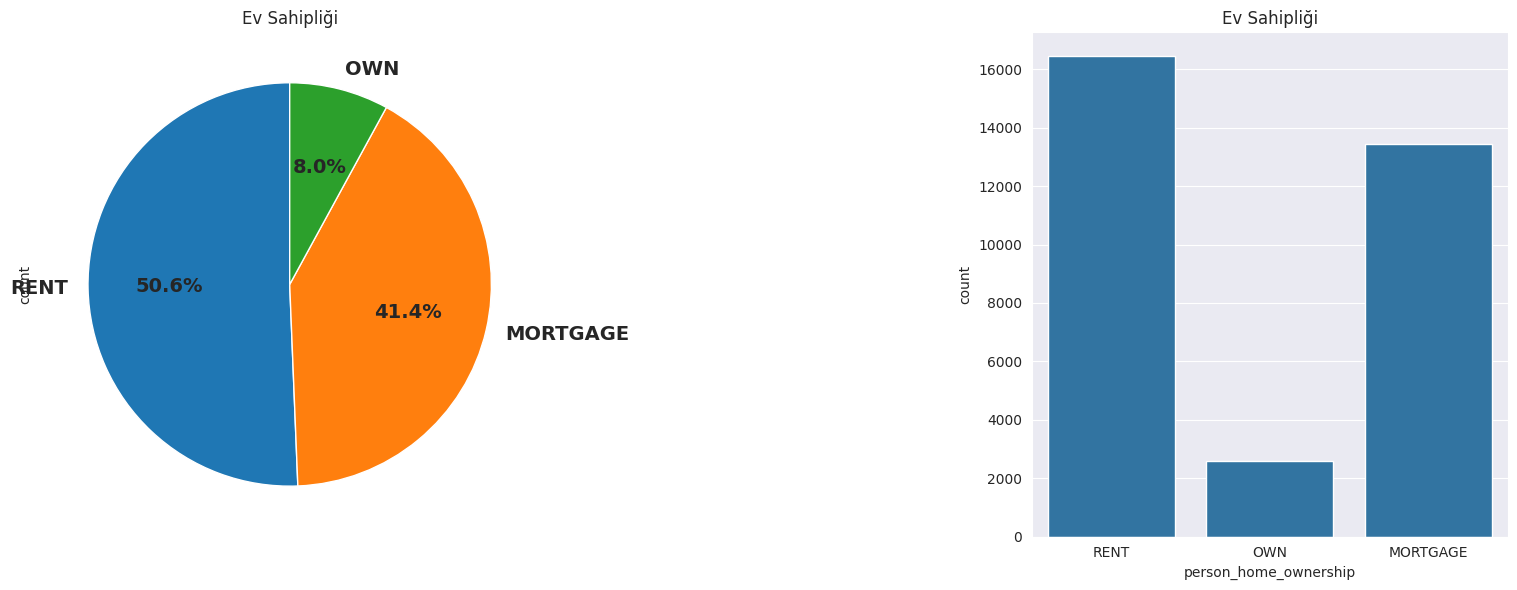

In [55]:
#Ev Sahipliği Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6),width_ratios=[4,1])
# Pie Chart
df['person_home_ownership'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Ev Sahipliği')

# Countplot
sns.countplot(x='person_home_ownership', data=df, ax=axes[1])
axes[1].set_title('Ev Sahipliği')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

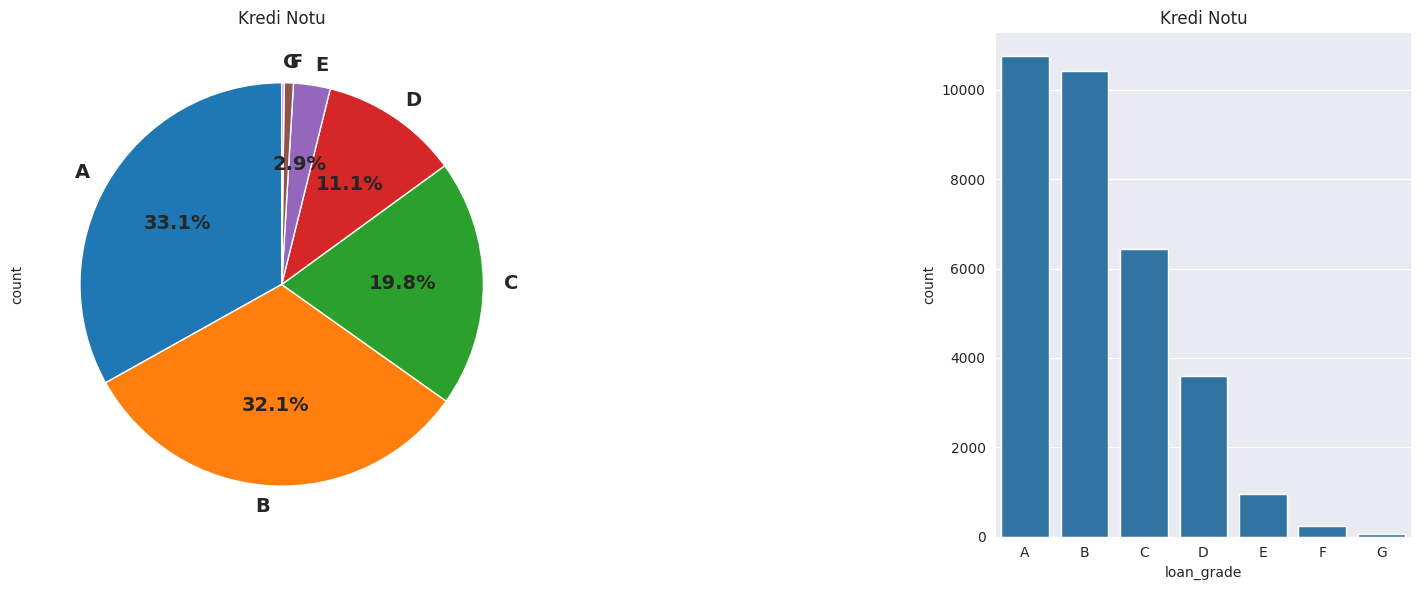

In [56]:
#Kredi Notu Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6), width_ratios=[5,1])
# Pie Chart
df['loan_grade'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kredi Notu')

# Countplot
sns.countplot(x='loan_grade', data=df, ax=axes[1],order=df['loan_grade'].value_counts().index)
axes[1].set_title('Kredi Notu')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

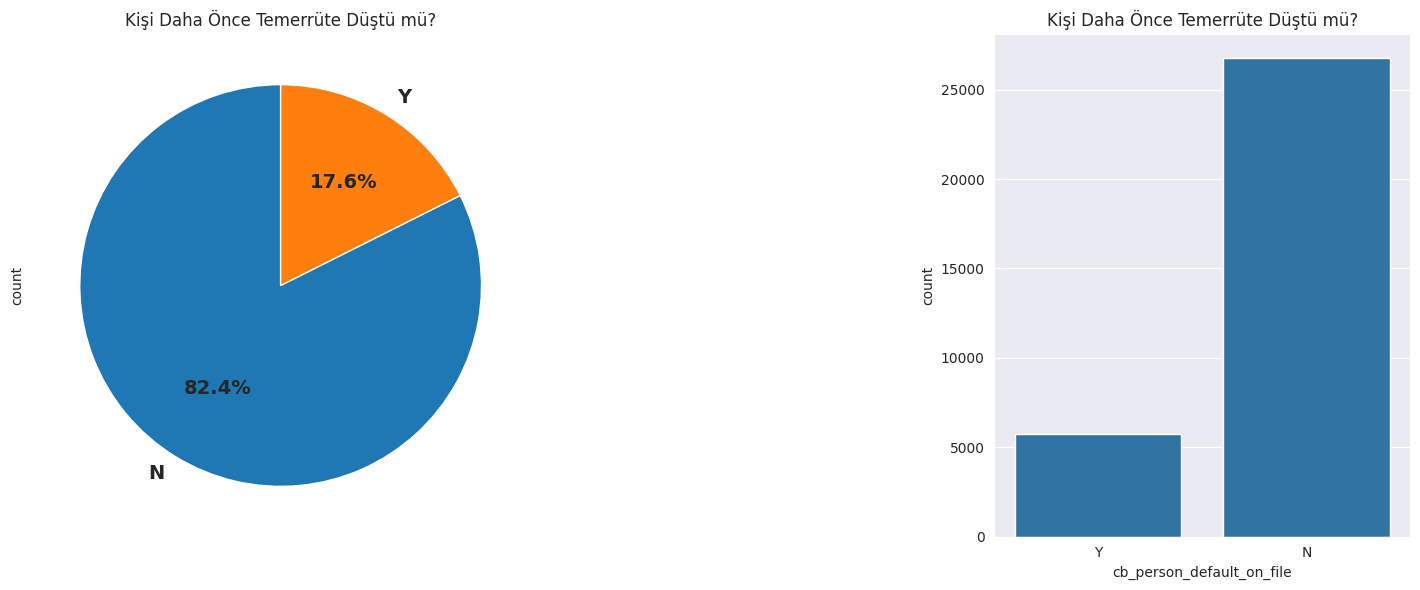

In [57]:
#Temerrüt Grafikleri
fig, axes = plt.subplots(1, 2, figsize=(22, 6), width_ratios=[5,1])
# Pie Chart
df['cb_person_default_on_file'].value_counts().plot.pie(ax=axes[0], autopct=lambda p: '{:.1f}%'.format(p) if p >= 2 else '', startangle=90,textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Kişi Daha Önce Temerrüte Düştü mü?')

# Countplot
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1])
axes[1].set_title('Kişi Daha Önce Temerrüte Düştü mü?')

# Grafiklerin gösterilmesi
plt.tight_layout()
plt.show()

In [58]:
# Null değer kontrolü
df.isnull().sum().sum()

np.int64(0)

In [59]:
# Tekrar eden veri kontrolü
df.loc[df.duplicated(keep=False)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14,23,115000,RENT,2.000000,EDUCATION,A,35000,7.90,False,0.30,N,4
238,22,183000,MORTGAGE,3.000000,EDUCATION,A,1000,7.49,False,0.01,N,2
252,24,85000,RENT,5.000000,MEDICAL,B,25000,10.62,False,0.29,N,4
591,26,20000,MORTGAGE,5.000000,MEDICAL,A,4800,5.99,False,0.24,N,3
740,21,21600,OWN,4.789686,VENTURE,A,7125,6.99,False,0.33,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.000000,HOMEIMPROVEMENT,A,2500,5.42,False,0.06,N,12
32047,36,250000,RENT,2.000000,DEBTCONSOLIDATION,A,20000,7.88,False,0.08,N,17
32172,49,120000,MORTGAGE,12.000000,MEDICAL,B,12000,10.99,False,0.10,N,12
32259,39,40000,OWN,4.000000,VENTURE,B,1000,10.37,False,0.03,N,16


In [60]:
# Tekrar eden verileri silme
df.drop_duplicates(keep='first', inplace=True)

/tmp/ipykernel_349583/2550499613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


In [61]:
# Silinen tekrar eden verilerin kontrolü
df.loc[df.duplicated(keep=False)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [62]:
# ONE HOT ENCODING adımı
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [63]:
# Kategorik değişkenlerin sayısal verilere dönüştürülmesi
le = LabelEncoder()
df['loan_grade_encoded'] = le.fit_transform(df['loan_grade'])

In [64]:
# Binary Encoding işlemi
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': True, 'N': False})

In [65]:
# Dataframein encodingden sonraki hali
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded
0,22,59000,123.0,D,35000,16.02,True,0.59,True,3,False,True,False,False,False,True,False,3
1,21,9600,5.0,B,1000,11.14,False,0.10,False,2,True,False,True,False,False,False,False,1
2,25,9600,1.0,C,5500,12.87,True,0.57,False,3,False,False,False,False,True,False,False,2
3,23,65500,4.0,C,35000,15.23,True,0.53,False,2,False,True,False,False,True,False,False,2
4,24,54400,8.0,C,35000,14.27,True,0.55,True,4,False,True,False,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,C,5800,13.16,False,0.11,False,30,False,False,False,False,False,True,False,2
32577,54,120000,4.0,A,17625,7.49,False,0.15,False,19,False,False,False,False,False,True,False,0
32578,65,76000,3.0,B,35000,10.99,True,0.46,False,28,False,True,False,True,False,False,False,1
32579,56,150000,5.0,B,15000,11.48,False,0.10,False,26,False,False,False,False,False,True,False,1


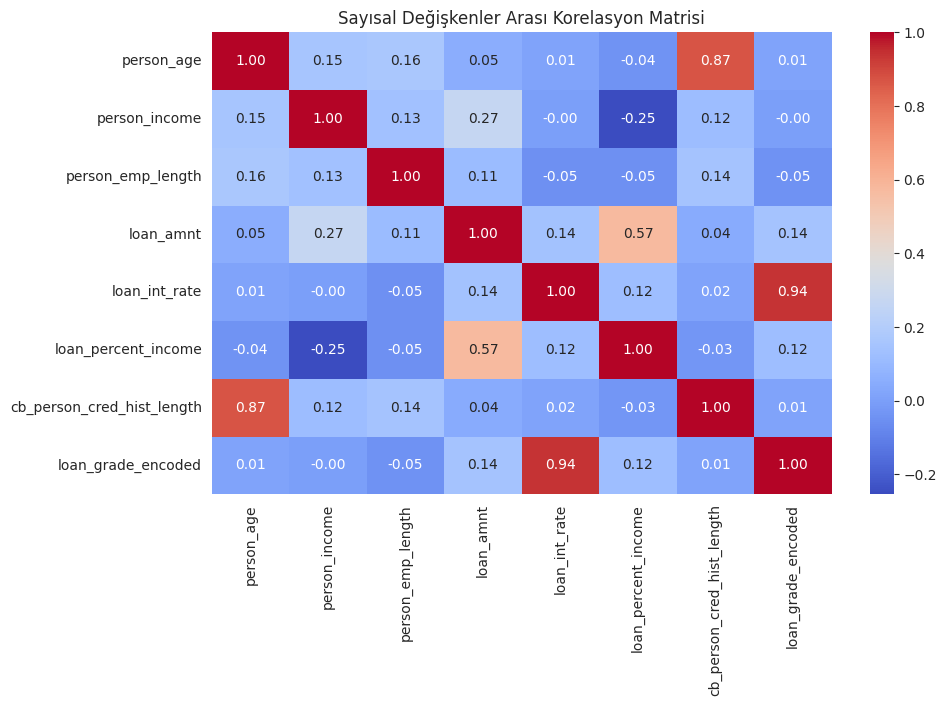

In [66]:
# Sayısal Değişkenlerin birbiri arasında korelasyonu, mesela kredi geçmişi yıl miktarı kişinin yaşıyla bir hayli korelasyon halinde doğal olarak.
# Kredi geri ödememe, yüksek faiz oranı ve gelire göre yüksek kredi yüzdesi ile ilişkili.
# loan_status = 1 (geri ödenmemiş) oranı ≈ %21.8
corr = df.select_dtypes(include=["int64", "float64"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32310.0,27.744475,6.274007,20.00,23.00,26.00,30.00,100.00
person_income,32310.0,66057.292912,61935.689221,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32310.0,4.794010,4.088664,0.00,2.00,4.00,7.00,123.00
loan_amnt,32310.0,9589.140359,6323.246255,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32310.0,11.016512,3.214282,5.42,7.88,10.99,13.48,23.22
loan_percent_income,32310.0,0.170181,0.106787,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32310.0,5.812844,4.059636,2.00,3.00,4.00,8.00,30.00
loan_grade_encoded,32310.0,1.219282,1.166498,0.00,0.00,1.00,2.00,6.00


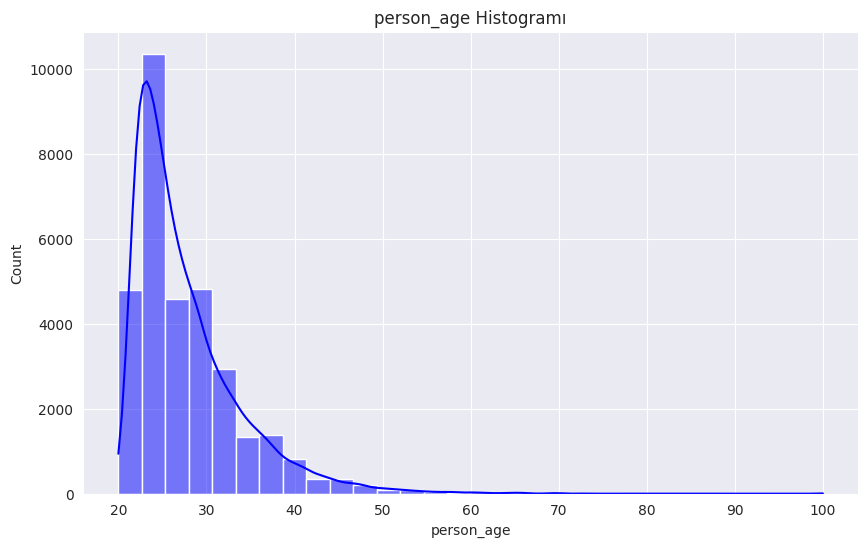

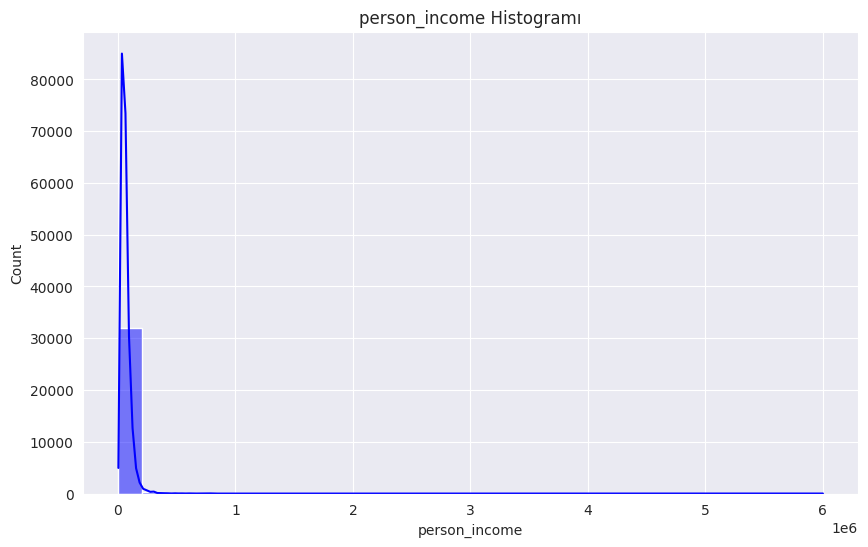

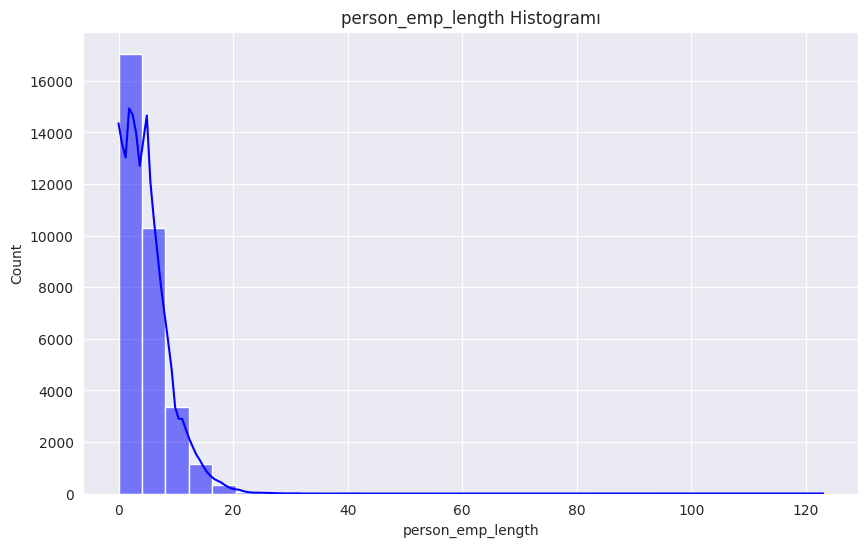

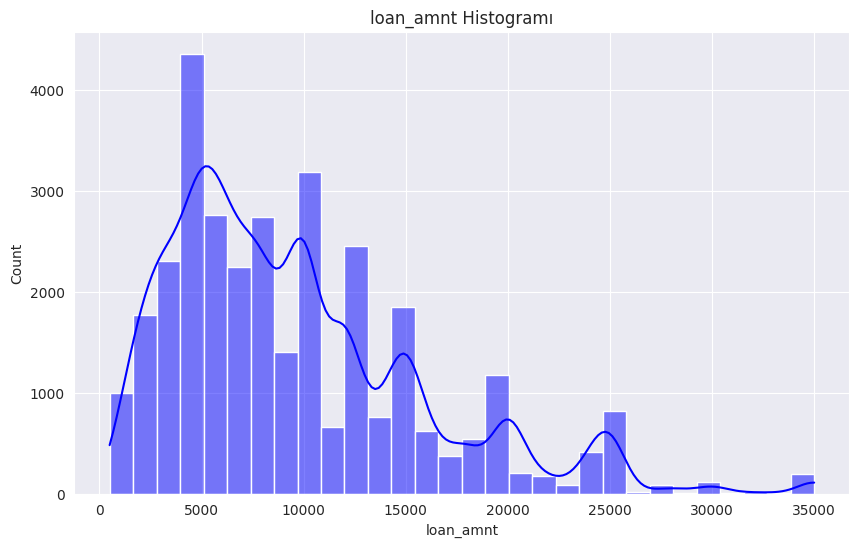

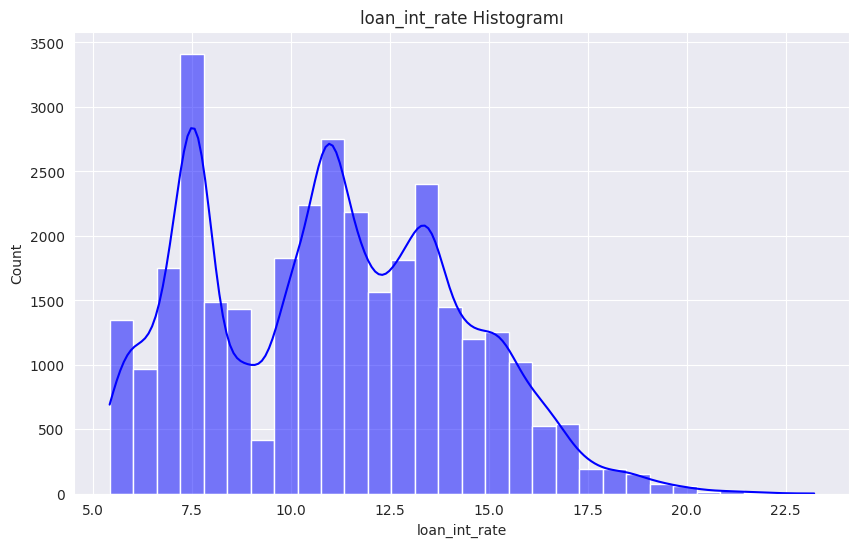

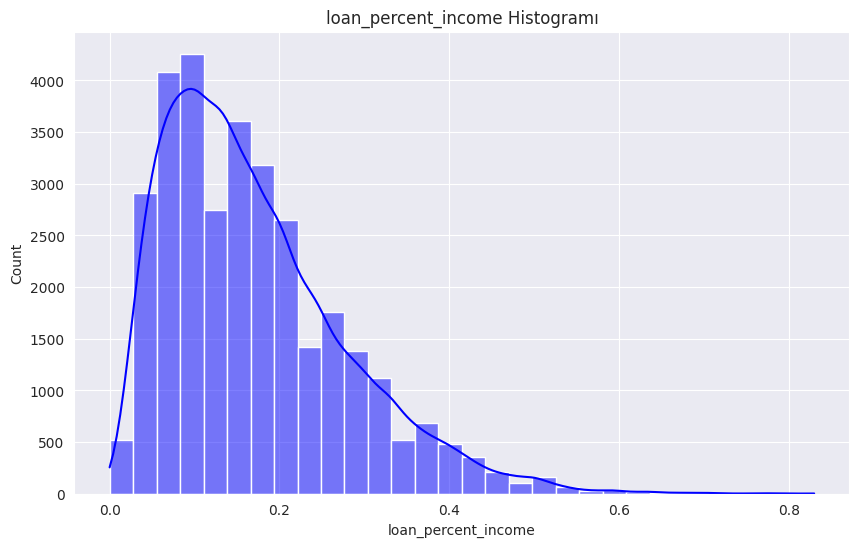

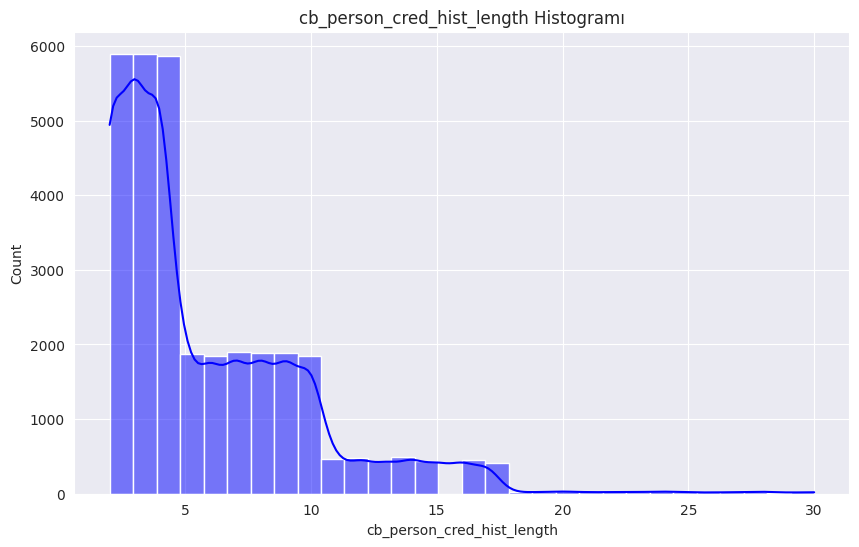

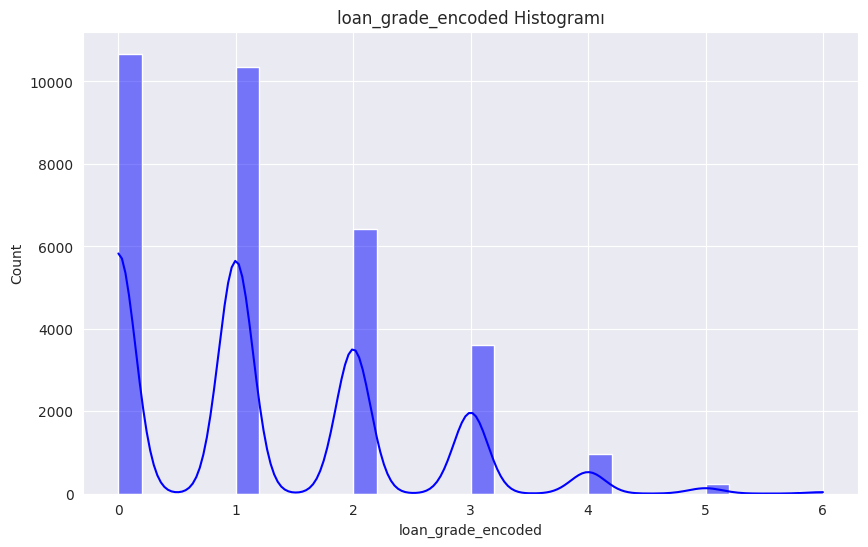

In [68]:
# Histogram grafikleri
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=df[col], bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"{col} Histogramı")
    plt.show()

In [69]:
# Yaş olarak çok fazla aykırı veri vardı ve bu yüzden yaş verisini logaritmik olarak dönüştürdüm.
df['log_person_age'] = np.log(df['person_age'])

In [70]:
# Gelir verisini logaritmik olarak dönüştürdüm ve IQR uyguladım. Gelir verisi çok fazla aykırı veri içeriyordu.
df['log_income'] = np.log1p(df['person_income'])  # log(1 + x)

Q1 = df['log_income'].quantile(0.25)
Q3 = df['log_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['log_income'] >= lower) & (df['log_income'] <= upper)]

<Axes: title={'center': 'person_age Histogramı'}, xlabel='log_person_age', ylabel='Count'>

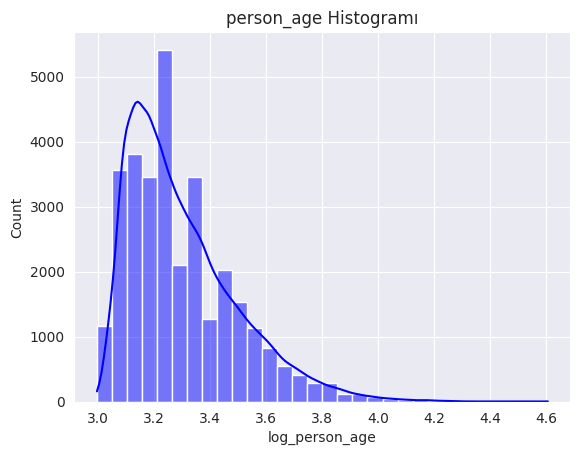

In [71]:
# Yaş için tekrar bir histogram grafiği çiziyorum
plt.title("person_age Histogramı")
sns.histplot(x=df['log_person_age'], bins=30, kde=True, color='blue', alpha=0.5)

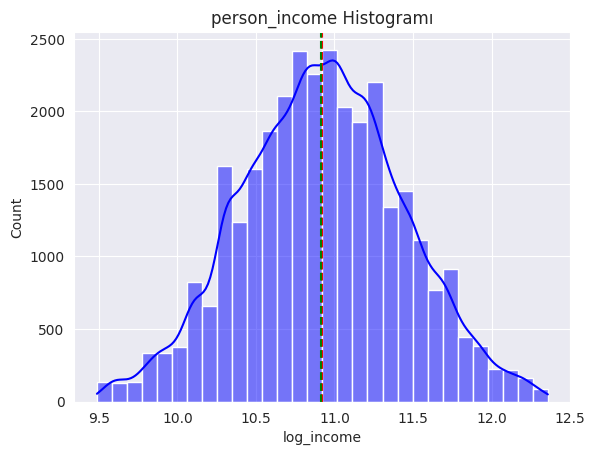

In [72]:
# Gelir için tekrar bir histogram grafiği çizdiriyorum
sns.histplot(x=df['log_income'], bins=30, kde=True, color='blue', alpha=0.5)
plt.title("person_income Histogramı")
plt.axvline(df['log_income'].mean(), color='red', linestyle='--')
plt.axvline(df['log_income'].median(), color='green', linestyle='--')